In [1]:
!python3.8 --version

Python 3.8.16


In [2]:
import pandas
from utils import calculate_percent_replicating_Target,calculate_percent_matching_Target
from utils import plot_simple_comparison, plot_two_comparisons
from utils import enforce_modality_match_order, enforce_timepoint_order, enforce_timepoint_order_in_plot, enforce_modality_match_order_in_plot

In [3]:
variable = 'Treatment timepoint'
variable_to_save = variable.replace(' ','_')

experiment_dict = {
    'A549':{
        'Compounds':{
            24:['BR00116991','BR00116992','BR00116993','BR00116994'],
            48:['BR00117015','BR00117016','BR00117017','BR00117019']},
        'ORF':{
            48:['BR00117020','BR00117021'],
            96:['BR00118050','BR00117006']},
        'CRISPR':{
            96:['BR00118041','BR00118042','BR00118043','BR00118044'],
            144:['BR00117000','BR00117003','BR00117004','BR00117005']}
            },
    'U2OS':{
        'Compounds':{
            24:['BR00116995','BR00117024','BR00117025','BR00117026'],
            48:['BR00117010','BR00117011','BR00117012','BR00117013']},
        'ORF':{
            48:['BR00117022','BR00117023'],
            96:['BR00118039','BR00118040']},
        'CRISPR':{
            96:['BR00118045','BR00118046','BR00118047','BR00118048'],
            144:['BR00116996','BR00116997','BR00116998','BR00116999' ]}
            }
    }


In [4]:

plate_df = pandas.DataFrame()

for eachline in list(experiment_dict.keys()):
    for eachmodality in list(experiment_dict[eachline].keys()):
        for eachtimepoint in list(experiment_dict[eachline][eachmodality].keys()):
            plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachline][eachmodality][eachtimepoint], 
            variable : eachtimepoint, 'Cell Type' : eachline, 'Percent Replicating' : calculate_percent_replicating_Target(
                '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',experiment_dict[eachline][eachmodality][eachtimepoint]),
                'Modality':eachmodality}, ignore_index=True)

/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31103/215662971.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachline][eachmodality][eachtimepoint],
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31103/215662971.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachline][eachmodality][eachtimepoint],
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31103/215662971.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachline][eachmodality][eachtimepoint],
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr

Saved to ../figures/Treatment timepoint-Percent Replicating-Cell Type-Modality-None.svg


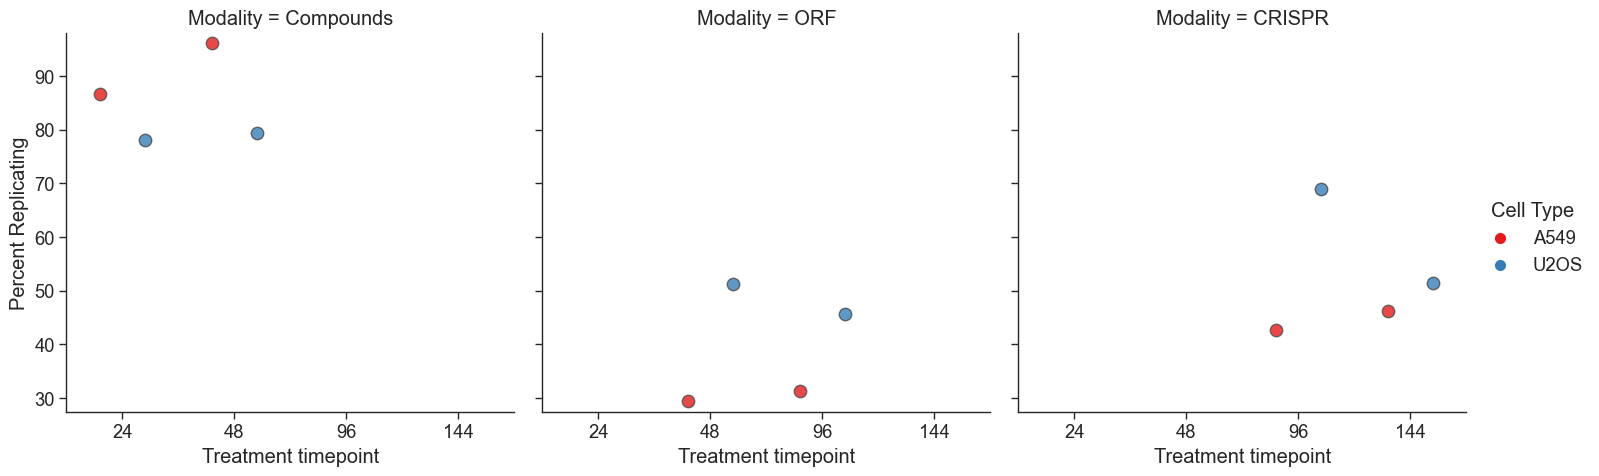

In [5]:
#You may find that running this a couple of times is needed to find a version where the jitter is about right
plot_simple_comparison(df=plate_df,x=variable,hue='Cell Type',col = 'Modality')

In [6]:
plate_df.to_csv(f'checkpoint_csvs/{variable_to_save}-replicating.csv',index=False)

In [7]:
variable = 'Treatment timepoint'

plate_match_df = pandas.DataFrame()

comparison_list = []

for eachline in list(experiment_dict.keys()):
    for eachmodality1 in list(experiment_dict[eachline].keys()):
        for eachmodality2 in list(experiment_dict[eachline].keys()):
            for eachtimepoint1 in list(experiment_dict[eachline][eachmodality1].keys()):
                for eachtimepoint2 in list(experiment_dict[eachline][eachmodality2].keys()):
                    string1 = f"{eachline}-{eachmodality1}-{eachtimepoint1}"
                    string2 = f"{eachline}-{eachmodality2}-{eachtimepoint2}"
                    if string1 != string2:
                        if f"{string1}-{string2}" not in comparison_list:
                            if f"{string2}-{string1}" not in comparison_list:
                                comparison_list.append(f"{string1}-{string2}")
                                plate_match_df = plate_match_df.append({'Percent Matching' : calculate_percent_matching_Target(
                                    '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',
                                    experiment_dict[eachline][eachmodality1][eachtimepoint1],eachmodality1, 
                                    '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',
                                    experiment_dict[eachline][eachmodality2][eachtimepoint2],eachmodality2),
                                    'Modality 1':eachmodality1,'Modality 2':eachmodality2, 'Modality Match':enforce_modality_match_order(eachmodality1,eachmodality2),
                                    variable:enforce_timepoint_order(eachtimepoint1,eachtimepoint2),'Cell Type':eachline}, ignore_index=True)


/Users/bcimini/Documents/GitHub/carpenterlab/2022_Cimini_NatureProtocols/notebooks/utils.py:559: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df_1['Metadata_modality'] = modality_1
/Users/bcimini/Documents/GitHub/carpenterlab/2022_Cimini_NatureProtocols/notebooks/utils.py:575: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df_2['Metadata_modality'] = modality_2
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31103/1469872564.py:18: FutureWarning: The frame.append method is deprecated and will be removed from

In [8]:
hue_order = enforce_timepoint_order_in_plot(list(plate_match_df['Treatment timepoint']))
col_order = enforce_modality_match_order_in_plot(list(plate_match_df['Modality Match']))

x = 'Cell Type'
y = 'Percent Matching'
hue = variable
col = 'Modality Match'

Saved to ../figures/Cell Type-Percent Matching-Treatment timepoint-Modality Match.png


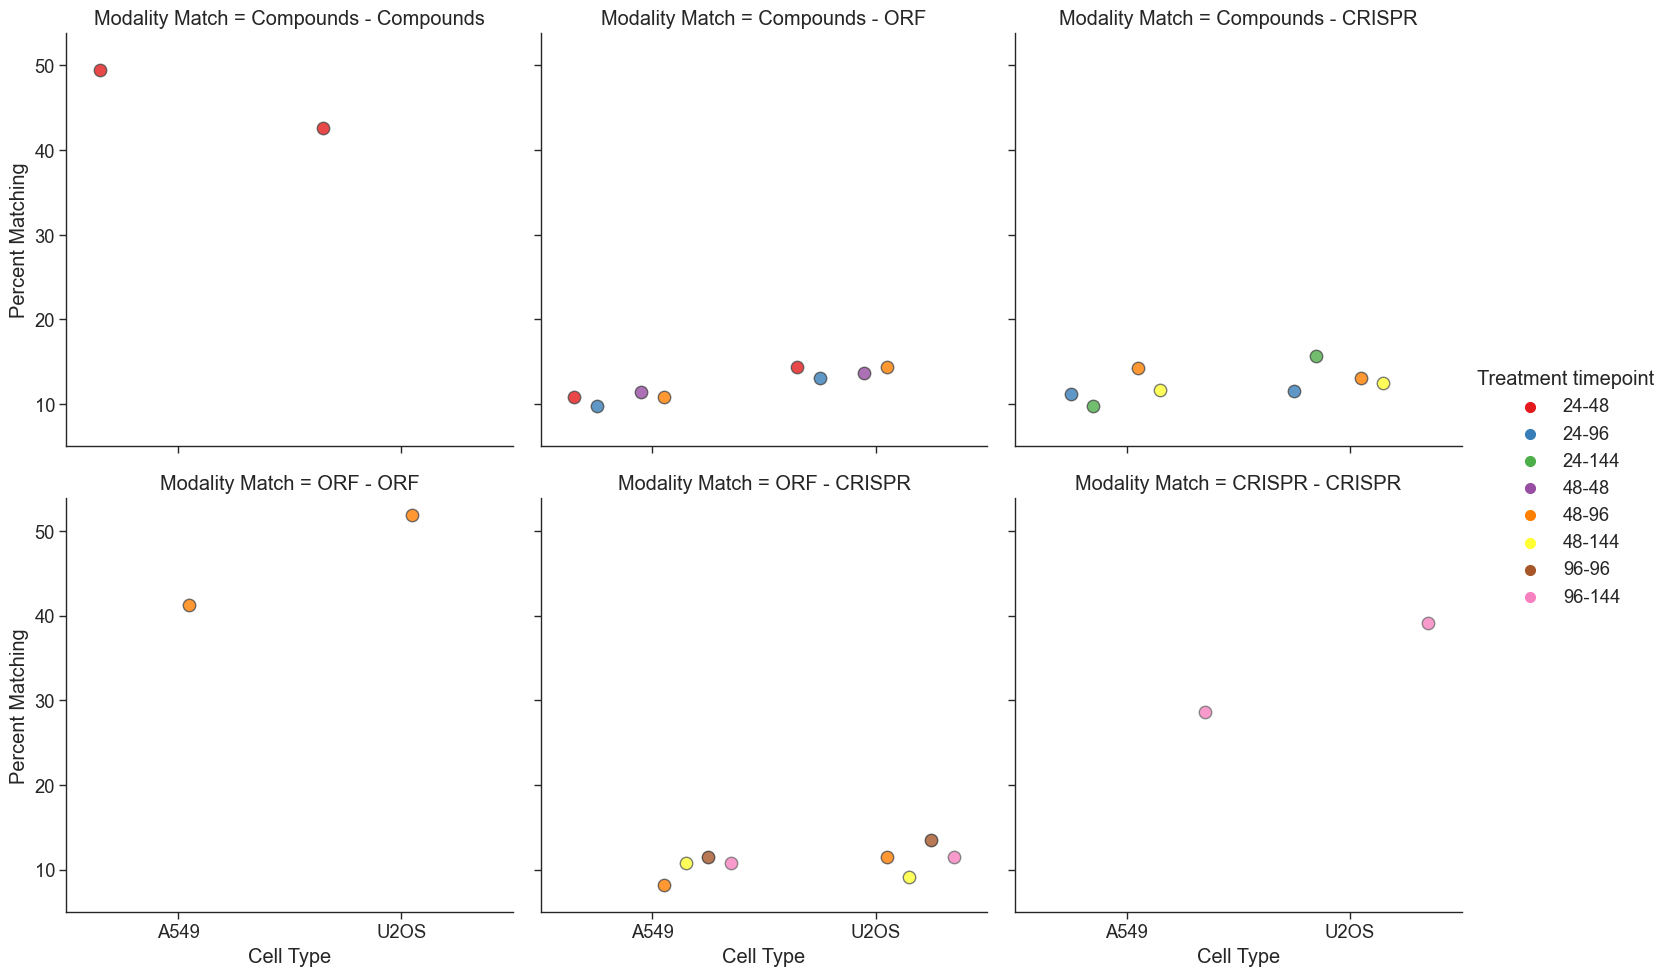

In [9]:
plot_simple_comparison(df=plate_match_df,x=x,y=y,hue=hue,
hue_order=hue_order, col = col, col_order = col_order, col_wrap=3,ylim=[5,40],
plotname=f"{x}-{y}-{hue}-{col}.png")

In [10]:
plate_match_df.to_csv(f'checkpoint_csvs/{variable_to_save}-matching.csv',index=False)

In [11]:
!python3.8 --version

Python 3.8.16


In [12]:
import pandas
from utils import calculate_percent_replicating_Target,calculate_percent_matching_Target
from utils import plot_simple_comparison, plot_two_comparisons
from utils import enforce_modality_match_order, enforce_timepoint_order, enforce_timepoint_order_in_plot, enforce_modality_match_order_in_plot

In [13]:
variable = 'Treatment timepoint'
variable_to_save = variable.replace(' ','_')
extended_variable_name = '            Treatment timepoints\n            of compared samples\n (shorter timepoint-longer timepoint)'


In [14]:
plate_match_df = pandas.read_csv(f'checkpoint_csvs/{variable_to_save}-matching.csv')

In [15]:
plate_match_df[extended_variable_name] = plate_match_df[variable]

hue_order = enforce_timepoint_order_in_plot(list(plate_match_df['Treatment timepoint']))
col_order = enforce_modality_match_order_in_plot(list(plate_match_df['Modality Match']))

x = 'Cell Type'
y = 'Percent Matching'
hue = extended_variable_name
col = 'Modality Match'

Saved to ../figures/Cell Type-Percent Matching-Treatment timepoint-Modality Match.svg


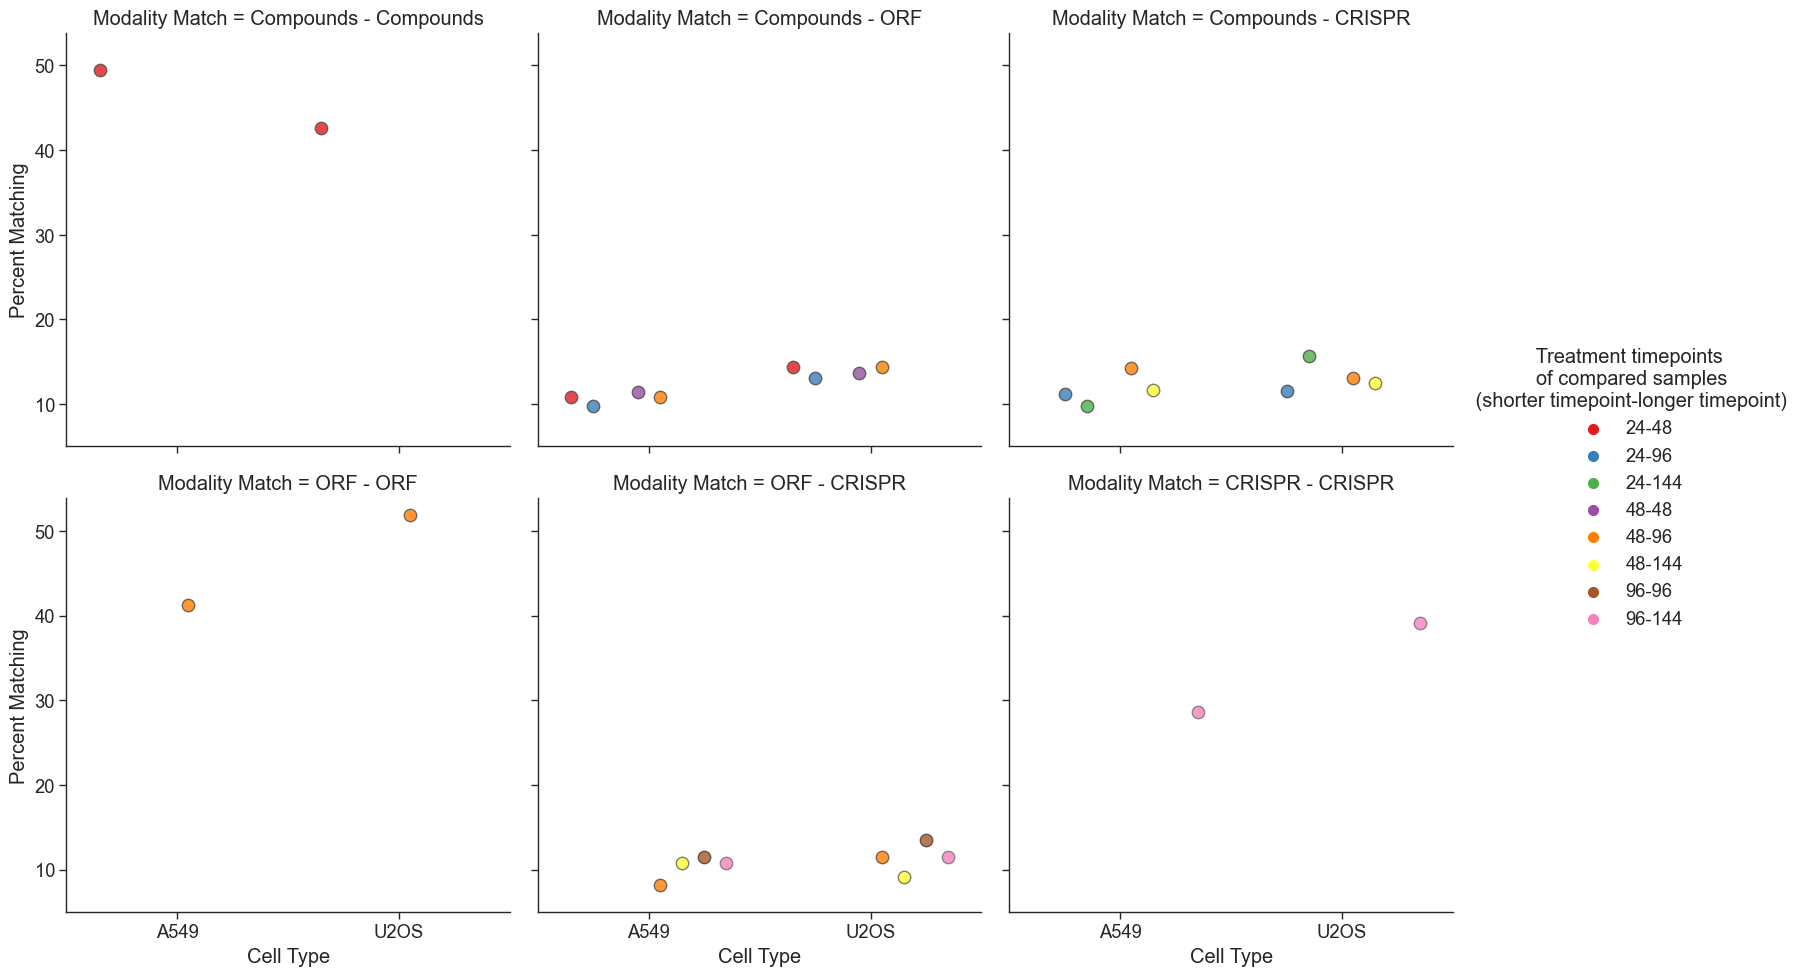

In [16]:
plot_simple_comparison(df=plate_match_df,x=x,y=y,hue=hue,
hue_order=hue_order, col = col, col_order = col_order, col_wrap=3,ylim=[5,40],
plotname=f"{x}-{y}-{variable}-{col}.svg")

In [17]:
!python3.8 --version

Python 3.8.16


In [18]:
import pandas

In [19]:
variable = 'Treatment timepoint'
variable_to_save = variable.replace(' ','_')

experiment_dict = {
    'A549':{
        'Compounds':{
            24:['BR00116991','BR00116992','BR00116993','BR00116994'],
            48:['BR00117015','BR00117016','BR00117017','BR00117019']},
        'ORF':{
            48:['BR00117020','BR00117021'],
            96:['BR00118050','BR00117006']},
        'CRISPR':{
            96:['BR00118041','BR00118042','BR00118043','BR00118044'],
            144:['BR00117000','BR00117003','BR00117004','BR00117005']}
            },
    'U2OS':{
        'Compounds':{
            24:['BR00116995','BR00117024','BR00117025','BR00117026'],
            48:['BR00117010','BR00117011','BR00117012','BR00117013']},
        'ORF':{
            48:['BR00117022','BR00117023'],
            96:['BR00118039','BR00118040']},
        'CRISPR':{
            96:['BR00118045','BR00118046','BR00118047','BR00118048'],
            144:['BR00116996','BR00116997','BR00116998','BR00116999' ]}
            }
    }

checkpoint_csv = f'checkpoint_csvs/{variable_to_save}-matching.csv'

In [20]:
def append_plates(checkpoint_csv,experiment_dict):
    df = pandas.read_csv(checkpoint_csv)
    df['Plates']=""
    for index, row in df.iterrows():
        lev1 = row['Cell Type']
        lev3 = row["Treatment timepoint"].split('-')
        #this is gross, but the fact of the matter is there's only one right combo so it will serve
        try:
            set_1 = experiment_dict[lev1][row['Modality 1']][int(lev3[0])]
            set_2 = experiment_dict[lev1][row['Modality 2']][int(lev3[1])]
        except:
            set_1 = experiment_dict[lev1][row['Modality 1']][int(lev3[1])]
            set_2 = experiment_dict[lev1][row['Modality 2']][int(lev3[0])]   
        df['Plates'][index] = str(set_1+set_2)
    df.to_csv(checkpoint_csv,index=False)

In [21]:
append_plates(checkpoint_csv,experiment_dict)

/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31103/2703275826.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plates'][index] = str(set_1+set_2)


In [22]:
!python3.8 --version
import pandas
from utils import plot_simple_comparison

variable = 'Treatment timepoint'
variable_to_save = variable.replace(' ','_')

df = pandas.read_csv(f'checkpoint_csvs/{variable_to_save}-replicating.csv')

Python 3.8.16


Saved to ../figures/Treatment timepoint-Percent Replicating-Cell Type-Modality-None.svg


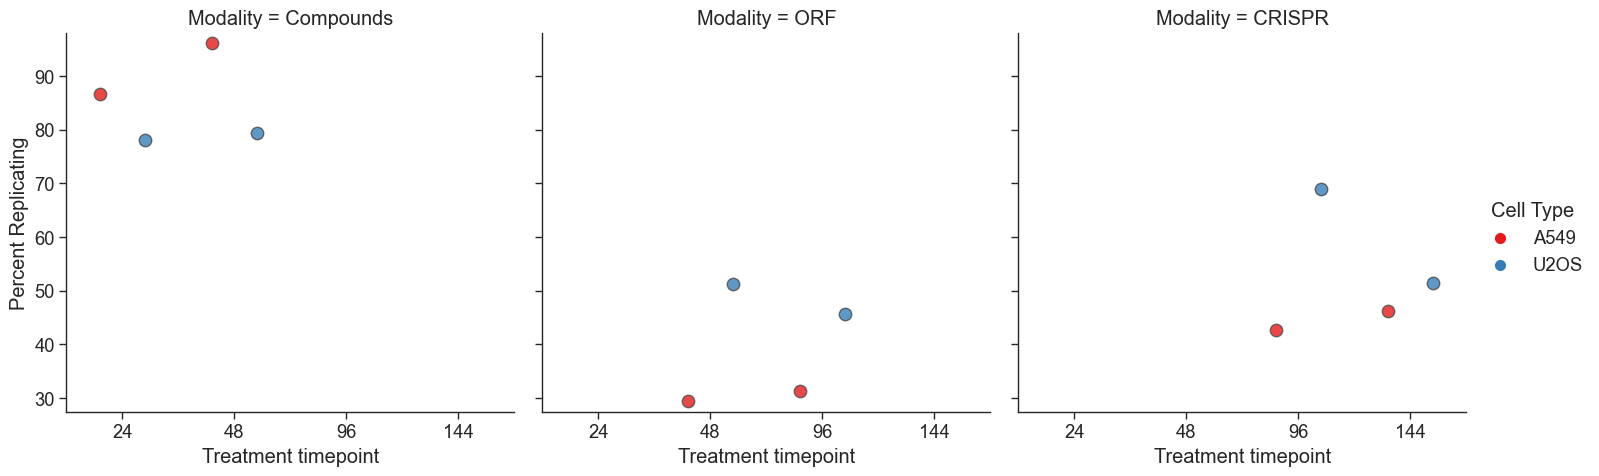

In [23]:
plot_simple_comparison(df=df,x=variable,hue='Cell Type',col = 'Modality')